Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
import glob
import pandas as pd
from keras import models
from keras import layers
from keras import regularizers
import numpy as np
import random
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
import zipfile
from shutil import copyfile
from keras.preprocessing import image
import tensorflow as tf
from google.colab import files


In [ ]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
def UpdateImage(source, label):
  fname = os.listdir(source)
  images= None
  
  for i,value in enumerate(fname):
    source_path = os.path.join(source, fname[i])
    if os.path.getsize(source_path)==0:
      print("file has zero size")
    else:
      img=image.load_img(source_path, target_size=(200, 200)) 
      x=image.img_to_array(img)                               
      x=tf.image.rgb_to_grayscale(x)                          
      x=np.expand_dims(x, axis=0)
      if images is None:
        images = x
      else:
        images = np.vstack((images, x))
  print(images.shape)
  images=images.reshape(images.shape[0], 200*200*1)
  print(images.shape)
  label_in = np.ones((len(fname), 1))
  label_in.fill(label)
  print(label_in.shape)
  images_new=np.hstack((images,label_in))
  print(images_new.shape)
  return images_new

In [ ]:
daisy = UpdateImage("/content/drive/MyDrive/Colab Notebooks/flowers/daisy", 0)
dandelion = UpdateImage("/content/drive/MyDrive/Colab Notebooks/flowers/dandelion", 1)
rose = UpdateImage("/content/drive/MyDrive/Colab Notebooks/flowers/rose", 2)
sunflower = UpdateImage("/content/drive/MyDrive/Colab Notebooks/flowers/sunflower", 3)
tulip = UpdateImage("/content/drive/MyDrive/Colab Notebooks/flowers/tulip", 4)

(769, 200, 200, 1)
(769, 40000)
(769, 1)
(769, 40001)
(1052, 200, 200, 1)
(1052, 40000)
(1052, 1)
(1052, 40001)
(784, 200, 200, 1)
(784, 40000)
(784, 1)
(784, 40001)
(734, 200, 200, 1)
(734, 40000)
(734, 1)
(734, 40001)
(984, 200, 200, 1)
(984, 40000)
(984, 1)
(984, 40001)


In [99]:
data_array = np.vstack((daisy, dandelion, rose, sunflower, tulip))
np.random.shuffle(data_array)

In [100]:
train_data, test_data, train_labels, test_labels=train_test_split(data_array[0:,:-1], data_array[:,-1], test_size=0.4, random_state = 0)


In [101]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
np.unique(test_labels)
train_data=train_data.astype("float32")/255
test_data = test_data.astype("float32")/255

In [102]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(64, activation="relu", input_shape=(40000,)))
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(5, activation="softmax"))
  model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])
  return model
model=build_model()

In [118]:
history=model.fit(train_data,train_labels, epochs =100, batch_size=512 )


Epoch 1/100
6/6 [==============================] - 1s 132ms/step - loss: 0.4403 - accuracy: 0.8454
Epoch 2/100
6/6 [==============================] - 1s 129ms/step - loss: 0.4806 - accuracy: 0.8326
Epoch 3/100
6/6 [==============================] - 1s 133ms/step - loss: 0.4611 - accuracy: 0.8195
Epoch 4/100
6/6 [==============================] - 1s 131ms/step - loss: 0.5037 - accuracy: 0.8118
Epoch 5/100
6/6 [==============================] - 1s 131ms/step - loss: 0.3879 - accuracy: 0.8673
Epoch 6/100
6/6 [==============================] - 1s 129ms/step - loss: 0.3781 - accuracy: 0.8743
Epoch 7/100
6/6 [==============================] - 1s 129ms/step - loss: 0.5163 - accuracy: 0.8037
Epoch 8/100
6/6 [==============================] - 1s 132ms/step - loss: 0.3822 - accuracy: 0.8739
Epoch 9/100
6/6 [==============================] - 1s 130ms/step - loss: 0.3688 - accuracy: 0.8824
Epoch 10/100
6/6 [==============================] - 1s 130ms/step - loss: 0.3819 - accuracy: 0.8766
Epoch 11/

In [119]:
# evaluate the model
scores = model.evaluate(train_data, train_labels)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


82/82 [==============================] - 1s 8ms/step - loss: 0.2775 - accuracy: 0.9074
accuracy: 90.74%


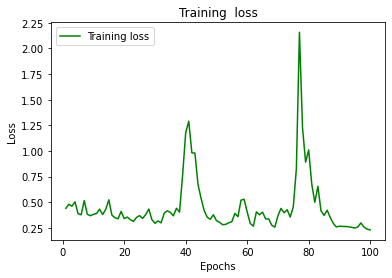

In [120]:
#evaluation and prediction
#Visualizing Training and Validation Loss
loss_train = history.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

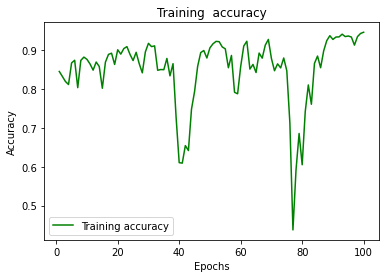

In [121]:
#Visualizing Training and Validation Accuracy
loss_train = history.history['accuracy']

epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [128]:
historyTest=model.fit(test_data,test_labels, epochs =100, batch_size=512)

Epoch 1/100
4/4 [==============================] - 1s 227ms/step - loss: 0.4755 - accuracy: 0.8699
Epoch 2/100
4/4 [==============================] - 1s 314ms/step - loss: 0.5161 - accuracy: 0.8497
Epoch 3/100
4/4 [==============================] - 1s 420ms/step - loss: 0.4531 - accuracy: 0.8746
Epoch 4/100
4/4 [==============================] - 1s 195ms/step - loss: 0.5210 - accuracy: 0.8353
Epoch 5/100
4/4 [==============================] - 1s 151ms/step - loss: 0.4940 - accuracy: 0.8434
Epoch 6/100
4/4 [==============================] - 1s 148ms/step - loss: 0.5623 - accuracy: 0.8075
Epoch 7/100
4/4 [==============================] - 1s 170ms/step - loss: 0.5918 - accuracy: 0.7902
Epoch 8/100
4/4 [==============================] - 1s 172ms/step - loss: 0.6199 - accuracy: 0.7763
Epoch 9/100
4/4 [==============================] - 1s 170ms/step - loss: 0.4730 - accuracy: 0.8665
Epoch 10/100
4/4 [==============================] - 1s 166ms/step - loss: 0.4451 - accuracy: 0.8780
Epoch 11/

In [129]:
# evaluate the model
scores = model.evaluate(test_data, test_labels)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

55/55 [==============================] - 0s 7ms/step - loss: 0.2715 - accuracy: 0.9399
accuracy: 93.99%


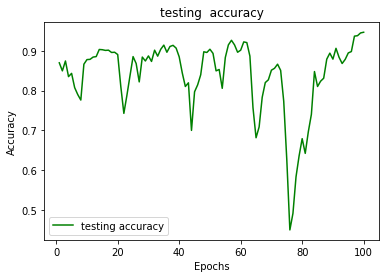

In [130]:
#Visualizing Training and Validation Accuracy
loss_test = historyTest.history['accuracy']

epochs = range(1,101)
plt.plot(epochs, loss_test, 'g', label='testing accuracy')

plt.title('testing  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
for i in range(200):
    print("train",train_data[i],"test",test_data[i])

train [0.11467607 0.17993608 0.15547293 ... 0.5999451  0.41124234 0.16197763] test [0.7882145  0.78037214 0.78849256 ... 0.08772235 0.10650079 0.1218051 ]
train [0.40458432 0.4391255  0.4936839  ... 0.20435058 0.22355804 0.23532157] test [0.39982784 0.406329   0.40875804 ... 0.2664859  0.27817762 0.28649136]
train [0.01616078 0.02121176 0.01846275 ... 0.09371412 0.10959216 0.09056   ] test [0.99990004 0.99990004 0.99990004 ... 0.9959788  0.9959788  0.99990004]
train [0.98856556 0.969111   0.98945963 ... 0.48277062 0.46199256 0.45135885] test [0.16448511 0.161011   0.17160237 ... 0.00392118 0.         0.01272431]
train [0.473431  0.4356271 0.4356271 ... 0.5658656 0.5658656 0.5737079] test [0.05374863 0.04982745 0.04982745 ... 0.12506118 0.11031295 0.09462823]
train [0.5420584  0.5302949  0.54990077 ... 0.32418942 0.31331998 0.28559372] test [0.29681295 0.3281824  0.3410757  ... 0.5327663  0.5053181  0.3955251 ]
train [0.9878161  0.9878161  0.98389494 ... 0.9878584  0.9878584  0.9917796 